In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import json
import os

___Data Cleaning___

In [2]:
# Importing slimmed down annual files
df_2019_1 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2019_1.csv")
df_2019_2 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2019_2.csv")
df_2018_1 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2018_1.csv")
df_2018_2 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2018_2.csv")
df_2017_1 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2017_1.csv")
df_2017_2 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2017_2.csv")
df_2016_1 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2016_1.csv")
df_2016_2 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2016_2.csv")
df_2015_1 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2015_1.csv")
df_2015_2 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2015_2.csv")
df_2014_1 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2014_1.csv")
df_2014_2 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2014_2.csv")
df_2013_1 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2013_1.csv")
df_2013_2 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2013_2.csv")
df_2012_1 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2012_1.csv")
df_2012_2 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2012_2.csv")
# df_2011_1 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2011_1.csv")
# df_2011_2 = pd.read_csv("Data_to_Clean/all_contracts_prime_transactions_2011_2.csv")

df_2019 = df_2019_1
df_2019 = df_2019.append(df_2019_2)
df_2018 = df_2018_1
df_2018 = df_2018.append(df_2018_2)
df_2017 = df_2017_1
df_2017 = df_2017.append(df_2017_2)
df_2016 = df_2016_1
df_2016 = df_2016.append(df_2016_2)
df_2015 = df_2015_1
df_2015 = df_2015.append(df_2015_2)
df_2014 = df_2014_1
df_2014 = df_2014.append(df_2014_2)
df_2013 = df_2013_1
df_2013 = df_2013.append(df_2013_2)
df_2012 = df_2012_1
df_2012 = df_2012.append(df_2012_2)
# df_2011 = df_2011_1
# df_2011 = df_2011.append(df_2011_2)

C:\Users\s01la\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,30,39,55,56,87,88,115,116,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\s01la\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,30,39,55,56,73,87,88,115,116,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\s01la\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3,21,30,39,87,88,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\s01la\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3,21,30,39,55,56,63,87,88,115,116,159,160) have mixed type

In [3]:
# Print the amount of data we have for each year
print(f"Number of rows in 2019 data: {len(df_2019['award_id_piid'])}")
print(f"Number of rows in 2018 data: {len(df_2018['award_id_piid'])}")
print(f"Number of rows in 2017 data: {len(df_2017['award_id_piid'])}")
print(f"Number of rows in 2016 data: {len(df_2016['award_id_piid'])}")
print(f"Number of rows in 2015 data: {len(df_2015['award_id_piid'])}")
print(f"Number of rows in 2014 data: {len(df_2014['award_id_piid'])}")
print(f"Number of rows in 2013 data: {len(df_2013['award_id_piid'])}")
print(f"Number of rows in 2012 data: {len(df_2012['award_id_piid'])}")
# print(f"Number of rows in 2011 data: {len(df_2011['award_id_piid'])}")

Number of rows in 2019 data: 67396
Number of rows in 2018 data: 76785
Number of rows in 2017 data: 82985
Number of rows in 2016 data: 80696
Number of rows in 2015 data: 84112
Number of rows in 2014 data: 87627
Number of rows in 2013 data: 82889
Number of rows in 2012 data: 81966


In [4]:
# Print the number of columns we currently have for each year
print(f"Number of columns in 2019 data: {len(df_2019.columns)}")
print(f"Number of columns in 2018 data: {len(df_2018.columns)}")
print(f"Number of columns in 2017 data: {len(df_2017.columns)}")
print(f"Number of columns in 2016 data: {len(df_2016.columns)}")
print(f"Number of columns in 2015 data: {len(df_2015.columns)}")
print(f"Number of columns in 2014 data: {len(df_2014.columns)}")
print(f"Number of columns in 2013 data: {len(df_2013.columns)}")
print(f"Number of columns in 2012 data: {len(df_2012.columns)}")
# print(f"Number of columns in 2011 data: {len(df_2011.columns)}")

Number of columns in 2019 data: 277
Number of columns in 2018 data: 277
Number of columns in 2017 data: 277
Number of columns in 2016 data: 277
Number of columns in 2015 data: 277
Number of columns in 2014 data: 277
Number of columns in 2013 data: 277
Number of columns in 2012 data: 277


In [5]:
# Show all of the columns within the spreadsheets
for column in df_2019.columns:
    print(column)

contract_transaction_unique_key
contract_award_unique_key
award_id_piid
modification_number
transaction_number
parent_award_agency_id
parent_award_agency_name
parent_award_id
parent_award_modification_number
federal_action_obligation
total_dollars_obligated
base_and_exercised_options_value
current_total_value_of_award
base_and_all_options_value
potential_total_value_of_award
action_date
action_date_fiscal_year
period_of_performance_start_date
period_of_performance_current_end_date
period_of_performance_potential_end_date
ordering_period_end_date
solicitation_date
awarding_agency_code
awarding_agency_name
awarding_sub_agency_code
awarding_sub_agency_name
awarding_office_code
awarding_office_name
funding_agency_code
funding_agency_name
funding_sub_agency_code
funding_sub_agency_name
funding_office_code
funding_office_name
treasury_accounts_funding_this_award
federal_accounts_funding_this_award
foreign_funding
foreign_funding_description
sam_exception
sam_exception_description
recipient_d

In [6]:
# Take out all of the rows we know will not be needed at this time
columns_to_drop = ['parent_award_agency_id','parent_award_id','potential_total_value_of_award','base_and_exercised_options_value',
                              'current_total_value_of_award','base_and_all_options_value','ordering_period_end_date','solicitation_date',
                              'awarding_agency_code','awarding_sub_agency_code','awarding_office_code','funding_agency_code',
                              'funding_sub_agency_code','funding_office_code','sam_exception','sam_exception_description','recipient_duns','recipient_doing_business_as_name',
                              'cage_code','recipient_parent_duns','recipient_country_code','recipient_address_line_2','recipient_state_code','domestic_shelter',
                              'community_development_corporation', 'us_government_entity','international_organization','small_agricultural_cooperative',
                              'sole_proprietorship','partnership_or_limited_liability_partnership','corporate_entity_tax_exempt','corporate_entity_not_tax_exempt',
                              'us_tribal_government','township_local_government','school_district_local_government','municipality_local_government',
                              'local_government_owned','inter_municipal_local_government','county_local_government','city_local_government',
                              'us_local_government','us_state_government','federally_funded_research_and_development_corp','us_federal_government',
                              'labor_surplus_area_firm','organizational_type','foreign_government','indian_tribe_federally_recognized','native_hawaiian_owned_business',
                               'contingency_humanitarian_or_peacekeeping_operation_code','purchase_card_as_payment_method_code',
                               'contract_financing','contract_financing_code','multi_year_contract_code','performance_based_service_acquisition',
                               'performance_based_service_acquisition_code','consolidated_contract','consolidated_contract_code','undefinitized_action',
                               'undefinitized_action_code','sea_transportation','sea_transportation_code','gfe_gfp','gfe_gfp_code','cost_accounting_standards_clause',
                               'cost_accounting_standards_clause_code','cost_or_pricing_data','cost_or_pricing_data_code','national_interest_action_code',
                               'parent_award_single_or_multiple_code','parent_award_type','parent_award_type_code','program_acronym',
                               'other_statutory_authority','interagency_contracting_authority','interagency_contracting_authority_code',
                               'construction_wage_rate_requirements_code','labor_standards_code','materials_supplies_articles_equipment',
                               'materials_supplies_articles_equipment_code','clinger_cohen_act_planning','clinger_cohen_act_planning_code',
                               'price_evaluation_adjustment_preference_percent_difference','local_area_set_aside','local_area_set_aside_code',
                               'fed_biz_opps_code','a76_fair_act_action_code','commercial_item_test_program','commercial_item_test_program_code','commercial_item_acquisition_procedures',
                               'commercial_item_acquisition_procedures_code','fair_opportunity_limited_sources_code','research_code','evaluated_preference',
                               'evaluated_preference_code','type_of_set_aside_code','solicitation_procedures_code','extent_competed_code',
                               'subcontracting_plan_code','place_of_manufacture_code','country_of_product_or_service_origin_code',
                               'epa_designated_product','epa_designated_product_code','information_technology_commercial_item_category',
                               'information_technology_commercial_item_category_code','dod_acquisition_program_description','dod_acquisition_program_code',
                               'domestic_or_foreign_entity_code','recovered_materials_sustainability_code','naics_code',
                               'dod_claimant_program_description','dod_claimant_program_code','contract_bundling','contract_bundling_code',
                               'inherently_governmental_functions_description','inherently_governmental_functions','solicitation_identifier',
                               'action_type_code','type_of_contract_pricing_code','type_of_idc','type_of_idc_code','multiple_or_single_award_idv',
                               'multiple_or_single_award_idv_code','idv_type','idv_type_code','award_type_code','award_or_idv_flag',
                               'primary_place_of_performance_congressional_district','primary_place_of_performance_zip_4','primary_place_of_performance_state_code',
                               'primary_place_of_performance_county_name','primary_place_of_performance_country_code',
                               'recipient_fax_number','recipient_phone_number','recipient_congressional_district','recipient_zip_4_code',
                               'foreign_funding_description','foreign_funding','federal_accounts_funding_this_award','treasury_accounts_funding_this_award',
                               'solicitation_date','ordering_period_end_date','period_of_performance_potential_end_date','action_date','parent_award_modification_number',
                               'transaction_number','highly_compensated_officer_5_amount','highly_compensated_officer_5_name',
                             'highly_compensated_officer_4_amount','highly_compensated_officer_4_name',
                             'highly_compensated_officer_3_amount','highly_compensated_officer_3_name',
                             'highly_compensated_officer_2_amount','highly_compensated_officer_2_name',
                             'highly_compensated_officer_1_amount','highly_compensated_officer_1_name',
                             'last_modified_date','veterinary_college','school_of_forestry','native_hawaiian_servicing_institution',
                             'alaskan_native_servicing_institution','tribal_college','historically_black_college','minority_institution',
                             '1994_land_grant_college','1890_land_grant_college','1862_land_grant_college','1862_land_grant_college','state_controlled_institution_of_higher_learning',
                             'private_university_or_college','annual_revenue','number_of_employees','the_ability_one_program','other_not_for_profit_organization',
                             'nonprofit_organization','limited_liability_corporation','subchapter_scorporation','transit_authority','port_authority',
                             'planning_commission','interstate_entity','housing_authorities_public_tribal','council_of_governments',
                             'airport_authority','receives_contracts_and_grants','receives_grants','receives_contracts',
                             'hispanic_servicing_institution','veterinary_hospital','manufacturer_of_goods','hospital_flag','foundation','educational_institution']
df_2019_clean = df_2019.drop(columns_to_drop, axis=1)
df_2018_clean = df_2018.drop(columns_to_drop, axis=1)
df_2017_clean = df_2017.drop(columns_to_drop, axis=1)
df_2016_clean = df_2016.drop(columns_to_drop, axis=1)
df_2015_clean = df_2015.drop(columns_to_drop, axis=1)
df_2014_clean = df_2014.drop(columns_to_drop, axis=1)
df_2013_clean = df_2013.drop(columns_to_drop, axis=1)
df_2012_clean = df_2012.drop(columns_to_drop, axis=1)
# df_2011_clean = df_2011.drop(columns_to_drop, axis=1)

In [7]:
# Show the columns that we dropped
for column in columns_to_drop:
    print(column)

parent_award_agency_id
parent_award_id
potential_total_value_of_award
base_and_exercised_options_value
current_total_value_of_award
base_and_all_options_value
ordering_period_end_date
solicitation_date
awarding_agency_code
awarding_sub_agency_code
awarding_office_code
funding_agency_code
funding_sub_agency_code
funding_office_code
sam_exception
sam_exception_description
recipient_duns
recipient_doing_business_as_name
cage_code
recipient_parent_duns
recipient_country_code
recipient_address_line_2
recipient_state_code
domestic_shelter
community_development_corporation
us_government_entity
international_organization
small_agricultural_cooperative
sole_proprietorship
partnership_or_limited_liability_partnership
corporate_entity_tax_exempt
corporate_entity_not_tax_exempt
us_tribal_government
township_local_government
school_district_local_government
municipality_local_government
local_government_owned
inter_municipal_local_government
county_local_government
city_local_government
us_local_go

In [8]:
# Ensure that each dataframe only has data for a single year
print(f"2019 dataframe has data for: {df_2019_clean['action_date_fiscal_year'].unique()}")
print(f"2018 dataframe has data for: {df_2018_clean['action_date_fiscal_year'].unique()}")
print(f"2017 dataframe has data for: {df_2017_clean['action_date_fiscal_year'].unique()}")
print(f"2016 dataframe has data for: {df_2016_clean['action_date_fiscal_year'].unique()}")
print(f"2015 dataframe has data for: {df_2015_clean['action_date_fiscal_year'].unique()}")
print(f"2014 dataframe has data for: {df_2014_clean['action_date_fiscal_year'].unique()}")
print(f"2013 dataframe has data for: {df_2013_clean['action_date_fiscal_year'].unique()}")
print(f"2012 dataframe has data for: {df_2012_clean['action_date_fiscal_year'].unique()}")
# print(f"2011 dataframe has data for: {df_2011_clean['action_date_fiscal_year'].unique()}")

2019 dataframe has data for: [2019]
2018 dataframe has data for: [2018]
2017 dataframe has data for: [2017]
2016 dataframe has data for: [2016]
2015 dataframe has data for: [2015]
2014 dataframe has data for: [2014]
2013 dataframe has data for: [2013]
2012 dataframe has data for: [2012]


In [9]:
# Combine all years into a single dataframe
total_cleaned_data = df_2019_clean
total_cleaned_data = total_cleaned_data.append(df_2018_clean)
total_cleaned_data = total_cleaned_data.append(df_2017_clean)
total_cleaned_data = total_cleaned_data.append(df_2016_clean)
total_cleaned_data = total_cleaned_data.append(df_2015_clean)
total_cleaned_data = total_cleaned_data.append(df_2014_clean)
total_cleaned_data = total_cleaned_data.append(df_2013_clean)
total_cleaned_data = total_cleaned_data.append(df_2012_clean)
# total_cleaned_data = total_cleaned_data.append(df_2011_clean)

In [10]:
# Show the amount of data we have for each column
total_cleaned_data.count()

contract_transaction_unique_key                               644456
contract_award_unique_key                                     644456
award_id_piid                                                 644456
modification_number                                           644456
parent_award_agency_name                                      387899
federal_action_obligation                                     644456
total_dollars_obligated                                       209102
action_date_fiscal_year                                       644456
period_of_performance_start_date                              644456
period_of_performance_current_end_date                        644455
awarding_agency_name                                          644456
awarding_sub_agency_name                                      644456
awarding_office_name                                          644455
funding_agency_name                                           644456
funding_sub_agency_name           

In [11]:
# Export final dataframe to CSV
# total_cleaned_data.to_csv("Annual_HSS_Data_Cleaned.csv", index=False)

In [12]:
for columns in total_cleaned_data.columns:
    print(columns)

contract_transaction_unique_key
contract_award_unique_key
award_id_piid
modification_number
parent_award_agency_name
federal_action_obligation
total_dollars_obligated
action_date_fiscal_year
period_of_performance_start_date
period_of_performance_current_end_date
awarding_agency_name
awarding_sub_agency_name
awarding_office_name
funding_agency_name
funding_sub_agency_name
funding_office_name
recipient_name
recipient_parent_name
recipient_country_name
recipient_address_line_1
recipient_city_name
recipient_state_name
primary_place_of_performance_country_name
primary_place_of_performance_city_name
primary_place_of_performance_state_name
award_type
type_of_contract_pricing
award_description
action_type
number_of_actions
product_or_service_code
product_or_service_code_description
naics_description
recovered_materials_sustainability
domestic_or_foreign_entity
country_of_product_or_service_origin
place_of_manufacture
subcontracting_plan
extent_competed
solicitation_procedures
type_of_set_aside

__Data Slicing for Competition__

In [13]:
# Group sum of obligations and count for all years by extent competed 
all_years_competition = pd.DataFrame(total_cleaned_data.groupby('extent_competed')['federal_action_obligation'].sum())
all_years_competition.columns =['Sum of Awards']
all_years_competition = all_years_competition.sort_values(by='Sum of Awards', ascending=False)
all_years_competition['Number of Awards'] = pd.DataFrame(total_cleaned_data.groupby('extent_competed')['award_id_piid'].count())
all_years_competition['Average Award Amount'] = all_years_competition['Sum of Awards']/all_years_competition['Number of Awards']
all_years_competition['Sum of Awards'] = all_years_competition['Sum of Awards'].map('${:,.2f}'.format)
all_years_competition['Average Award Amount'] = all_years_competition['Average Award Amount'].map('${:,.2f}'.format)
all_years_competition.reset_index(inplace=True)
all_years_competition

,extent_competed,Sum of Awards,Number of Awards,Average Award Amount
0,FULL AND OPEN COMPETITION,"$121,808,512,606.89",269001,"$452,818.07"
1,FULL AND OPEN COMPETITION AFTER EXCLUSION OF S...,"$17,024,150,132.93",51321,"$331,718.99"
2,NOT COMPETED,"$11,699,659,028.44",44892,"$260,617.91"
3,NOT AVAILABLE FOR COMPETITION,"$5,457,669,293.63",33870,"$161,135.79"
4,COMPETED UNDER SAP,"$3,925,830,826.64",148196,"$26,490.80"
5,NOT COMPETED UNDER SAP,"$2,425,862,569.68",85584,"$28,344.81"
6,COMPETITIVE DELIVERY ORDER,"$1,650,598,739.58",6477,"$254,840.01"
7,NON-COMPETITIVE DELIVERY ORDER,"$884,044,613.01",1807,"$489,233.32"
8,FOLLOW ON TO COMPETED ACTION,"$1,592,307.80",379,"$4,201.34"


In [14]:
# Group sum of obligations and count by extent competed and fiscal year
by_years_competition = pd.DataFrame(total_cleaned_data.groupby(['extent_competed', 'action_date_fiscal_year'])['federal_action_obligation'].sum())
by_years_competition.columns =['Sum of Awards']
by_years_competition = by_years_competition.sort_values(by='Sum of Awards', ascending=False)
by_years_competition.reset_index(inplace=True)
by_years_competition['Sum of Awards'] = by_years_competition['Sum of Awards'].map('${:,.2f}'.format)
by_years_competition_pivot = by_years_competition.pivot(index='extent_competed',columns='action_date_fiscal_year',values='Sum of Awards')
by_years_competition_pivot

action_date_fiscal_year,2012,2013,2014,2015,2016,2017,2018,2019
extent_competed,,,,,,,,
COMPETED UNDER SAP,"$411,557,924.23","$385,945,474.77","$470,630,669.63","$455,561,434.73","$591,751,328.94","$531,953,521.87","$537,705,611.40","$540,724,861.07"
COMPETITIVE DELIVERY ORDER,"$715,932,104.78","$408,385,740.50","$246,876,897.54","$106,000,450.17","$78,812,858.00","$40,949,509.66","$24,085,268.30","$29,555,910.63"
FOLLOW ON TO COMPETED ACTION,"$1,824,048.94","$1,659,274.14","$-717,673.12","$-1,110,200.07","$-42,472.74","$1,430.65","$-21,700.00",$-400.00
FULL AND OPEN COMPETITION,"$12,718,739,129.22","$14,581,417,852.14","$16,333,120,461.52","$14,673,982,702.83","$14,551,878,044.04","$16,639,302,810.76","$15,641,651,457.35","$16,668,420,149.03"
FULL AND OPEN COMPETITION AFTER EXCLUSION OF SOURCES,"$1,493,671,184.99","$1,966,195,740.14","$1,952,313,296.45","$2,069,650,352.95","$2,250,127,929.21","$2,277,912,674.03","$2,423,257,846.71","$2,591,021,108.45"
NON-COMPETITIVE DELIVERY ORDER,"$471,712,595.61","$233,419,155.24","$168,340,611.51","$3,224,325.29","$862,553.61","$1,085,780.28","$2,455,918.66","$2,943,672.81"
NOT AVAILABLE FOR COMPETITION,"$661,780,695.27","$565,528,468.17","$554,661,652.43","$638,175,230.08","$708,072,488.91","$772,856,496.49","$835,257,231.20","$721,337,031.08"
NOT COMPETED,"$1,594,516,266.79","$1,337,751,384.91","$1,530,533,953.53","$1,313,480,126.63","$1,389,815,326.85","$1,871,369,479.80","$1,618,994,831.91","$1,043,197,658.02"
NOT COMPETED UNDER SAP,"$217,400,177.14","$236,830,313.63","$249,191,274.17","$318,450,929.72","$305,977,634.53","$324,273,871.03","$357,036,456.25","$416,701,913.21"


In [15]:
# Change the types of extent competed into two buckets: Competed & Not-Competed
total_cleaned_competition_column = total_cleaned_data
total_cleaned_competition_column['extent_competed'] = total_cleaned_competition_column['extent_competed'].replace({'COMPETED UNDER SAP':'Competed',
                                                                                                              'COMPETITIVE DELIVERY ORDER':'Competed',
                                                                                                              'FOLLOW ON TO COMPETED ACTION':'Competed',
                                                                                                              'FULL AND OPEN COMPETITION':'Competed',
                                                                                                              'FULL AND OPEN COMPETITION AFTER EXCLUSION OF SOURCES':'Competed',
                                                                                                              'NON-COMPETITIVE DELIVERY ORDER':'Not Competed',
                                                                                                              'NOT AVAILABLE FOR COMPETITION':'Not Competed',
                                                                                                              'NOT COMPETED':'Not Competed',
                                                                                                              'NOT COMPETED UNDER SAP':'Not Competed'})
grouping_all_years_competition = pd.DataFrame(total_cleaned_competition_column.groupby('extent_competed')['federal_action_obligation'].sum())
grouping_all_years_competition.columns =['Sum of Awards']
total_HHS_spend = grouping_all_years_competition['Sum of Awards'].sum()
grouping_all_years_competition['% Total'] = (grouping_all_years_competition['Sum of Awards']/total_HHS_spend)*100
grouping_all_years_competition['Sum of Awards'] = grouping_all_years_competition['Sum of Awards'].map('${:,.2f}'.format)
grouping_all_years_competition['% Total'] = grouping_all_years_competition['% Total'].map('{:,.2f}%'.format)
grouping_all_years_competition.reset_index(inplace=True)
grouping_all_years_competition
total_cleaned_competition_column

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,parent_award_agency_name,federal_action_obligation,total_dollars_obligated,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,...,community_developed_corporation_owned_firm,federal_agency,foreign_owned_and_located,for_profit_organization,dot_certified_disadvantage,self_certified_small_disadvantaged_business,small_disadvantaged_business,c8a_program_participant,historically_underutilized_business_zone_hubzone_firm,sba_certified_8a_joint_venture
0,7523_-NONE-_75D30118C01909_P00001_-NONE-_0,CONT_AWD_75D30118C01909_7523_-NONE-_-NONE-,75D30118C01909,P00001,NaN,0.00,2.958229e+05,2019,2018-09-28 00:00:00,2019-06-14 00:00:00,...,f,f,f,t,t,t,f,t,t,f
1,7523_-NONE-_75D30118C02052_P00001_-NONE-_0,CONT_AWD_75D30118C02052_7523_-NONE-_-NONE-,75D30118C02052,P00001,NaN,0.00,1.523552e+05,2019,2018-09-28 00:00:00,2019-09-15 00:00:00,...,f,f,f,t,t,t,f,t,t,f
2,7523_-NONE-_HHSD200201692404C_3_-NONE-_0,CONT_AWD_HHSD200201692404C_7523_-NONE-_-NONE-,HHSD200201692404C,3,NaN,0.00,1.308998e+06,2019,2018-10-01 00:00:00,2021-09-26 00:00:00,...,f,f,f,t,f,t,f,t,t,f
3,7523_-NONE-_HHSD200201692405C_3_-NONE-_0,CONT_AWD_HHSD200201692405C_7523_-NONE-_-NONE-,HHSD200201692405C,3,NaN,0.00,9.700000e+03,2019,2018-10-01 00:00:00,2021-09-26 00:00:00,...,f,f,f,t,f,f,f,f,f,f
4,7523_-NONE-_HHSD200201692406C_8_-NONE-_0,CONT_AWD_HHSD200201692406C_7523_-NONE-_-NONE-,HHSD200201692406C,8,NaN,0.00,6.141097e+05,2019,2018-10-01 00:00:00,2021-09-26 00:00:00,...,f,f,f,t,f,f,f,f,f,f
5,7523_-NONE-_HHSD200201692407C_5_-NONE-_0,CONT_AWD_HHSD200201692407C_7523_-NONE-_-NONE-,HHSD200201692407C,5,NaN,0.00,1.584600e+06,2019,2018-10-01 00:00:00,2021-09-26 00:00:00,...,f,f,f,t,f,f,f,f,f,f
6,7523_-NONE-_HHSD200201692409C_5_-NONE-_0,CONT_AWD_HHSD200201692409C_7523_-NONE-_-NONE-,HHSD200201692409C,5,NaN,0.00,3.411375e+06,2019,2018-10-01 00:00:00,2021-09-26 00:00:00,...,f,f,f,t,f,f,f,f,f,f
7,7523_-NONE-_HHSD200201692410C_10_-NONE-_0,CONT_AWD_HHSD200201692410C_7523_-NONE-_-NONE-,HHSD200201692410C,10,NaN,0.00,3.187658e+06,2019,2018-10-01 00:00:00,2021-09-26 00:00:00,...,f,f,f,t,f,t,f,t,f,f
8,7523_-NONE-_HHSD200201692411C_5_-NONE-_0,CONT_AWD_HHSD200201692411C_7523_-NONE-_-NONE-,HHSD200201692411C,5,NaN,0.00,5.025930e+05,2019,2018-10-01 00:00:00,2021-09-26 00:00:00,...,f,f,f,t,f,f,f,f,f,f
9,7530_-NONE-_HHSM500201600049C_P00002_-NONE-_0,CONT_AWD_HHSM500201600049C_7530_-NONE-_-NONE-,HHSM500201600049C,P00002,NaN,-5.64,6.281394e+05,2019,2018-10-01 00:00:00,2018-03-31 00:00:00,...,f,f,f,t,f,f,f,t,f,f


In [16]:
# Bucketing the data by year
total_cleaned_2019 = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['action_date_fiscal_year']==2019, :])
total_cleaned_2018 = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['action_date_fiscal_year']==2018, :])
total_cleaned_2017 = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['action_date_fiscal_year']==2017, :])
total_cleaned_2016 = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['action_date_fiscal_year']==2016, :])
total_cleaned_2015 = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['action_date_fiscal_year']==2015, :])
total_cleaned_2014 = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['action_date_fiscal_year']==2014, :])
total_cleaned_2013 = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['action_date_fiscal_year']==2013, :])
total_cleaned_2012 = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['action_date_fiscal_year']==2012, :])

In [83]:
# Looking at Competed & Not-Competed by year
grouping_2019_competition = pd.DataFrame(total_cleaned_2019.groupby('extent_competed')['federal_action_obligation'].sum())
grouping_2018_competition = pd.DataFrame(total_cleaned_2018.groupby('extent_competed')['federal_action_obligation'].sum())
grouping_2017_competition = pd.DataFrame(total_cleaned_2017.groupby('extent_competed')['federal_action_obligation'].sum())
grouping_2016_competition = pd.DataFrame(total_cleaned_2016.groupby('extent_competed')['federal_action_obligation'].sum())
grouping_2015_competition = pd.DataFrame(total_cleaned_2015.groupby('extent_competed')['federal_action_obligation'].sum())
grouping_2014_competition = pd.DataFrame(total_cleaned_2014.groupby('extent_competed')['federal_action_obligation'].sum())
grouping_2013_competition = pd.DataFrame(total_cleaned_2013.groupby('extent_competed')['federal_action_obligation'].sum())
grouping_2012_competition = pd.DataFrame(total_cleaned_2012.groupby('extent_competed')['federal_action_obligation'].sum())

grouping_by_year_competition = grouping_2012_competition
grouping_by_year_competition = grouping_by_year_competition.merge(grouping_2013_competition, left_index=True,right_index=True)
grouping_by_year_competition = grouping_by_year_competition.merge(grouping_2014_competition, left_index=True,right_index=True)
grouping_by_year_competition = grouping_by_year_competition.merge(grouping_2015_competition, left_index=True,right_index=True)
grouping_by_year_competition = grouping_by_year_competition.merge(grouping_2016_competition, left_index=True,right_index=True)
grouping_by_year_competition = grouping_by_year_competition.merge(grouping_2017_competition, left_index=True,right_index=True)
grouping_by_year_competition = grouping_by_year_competition.merge(grouping_2018_competition, left_index=True,right_index=True)
grouping_by_year_competition = grouping_by_year_competition.merge(grouping_2019_competition, left_index=True,right_index=True)

grouping_by_year_competition.columns = ['2012','2013','2014','2015','2016','2017','2018','2019']

grouping_by_year_competition['2012'] = grouping_by_year_competition['2012']/1000000000
grouping_by_year_competition['2013'] = grouping_by_year_competition['2013']/1000000000
grouping_by_year_competition['2014'] = grouping_by_year_competition['2014']/1000000000
grouping_by_year_competition['2015'] = grouping_by_year_competition['2015']/1000000000
grouping_by_year_competition['2016'] = grouping_by_year_competition['2016']/1000000000
grouping_by_year_competition['2017'] = grouping_by_year_competition['2017']/1000000000
grouping_by_year_competition['2018'] = grouping_by_year_competition['2018']/1000000000
grouping_by_year_competition['2019'] = grouping_by_year_competition['2019']/1000000000


grouping_by_year_competition

,2012,2013,2014,2015,2016,2017,2018,2019
extent_competed,,,,,,,,
Competed,15.341724,17.343604,19.002224,17.304085,17.472528,19.490120,18.626678,19.829722
Not Competed,2.945410,2.373529,2.502727,2.273331,2.404728,2.969586,2.813744,2.184180


<IPython.core.display.Javascript object>


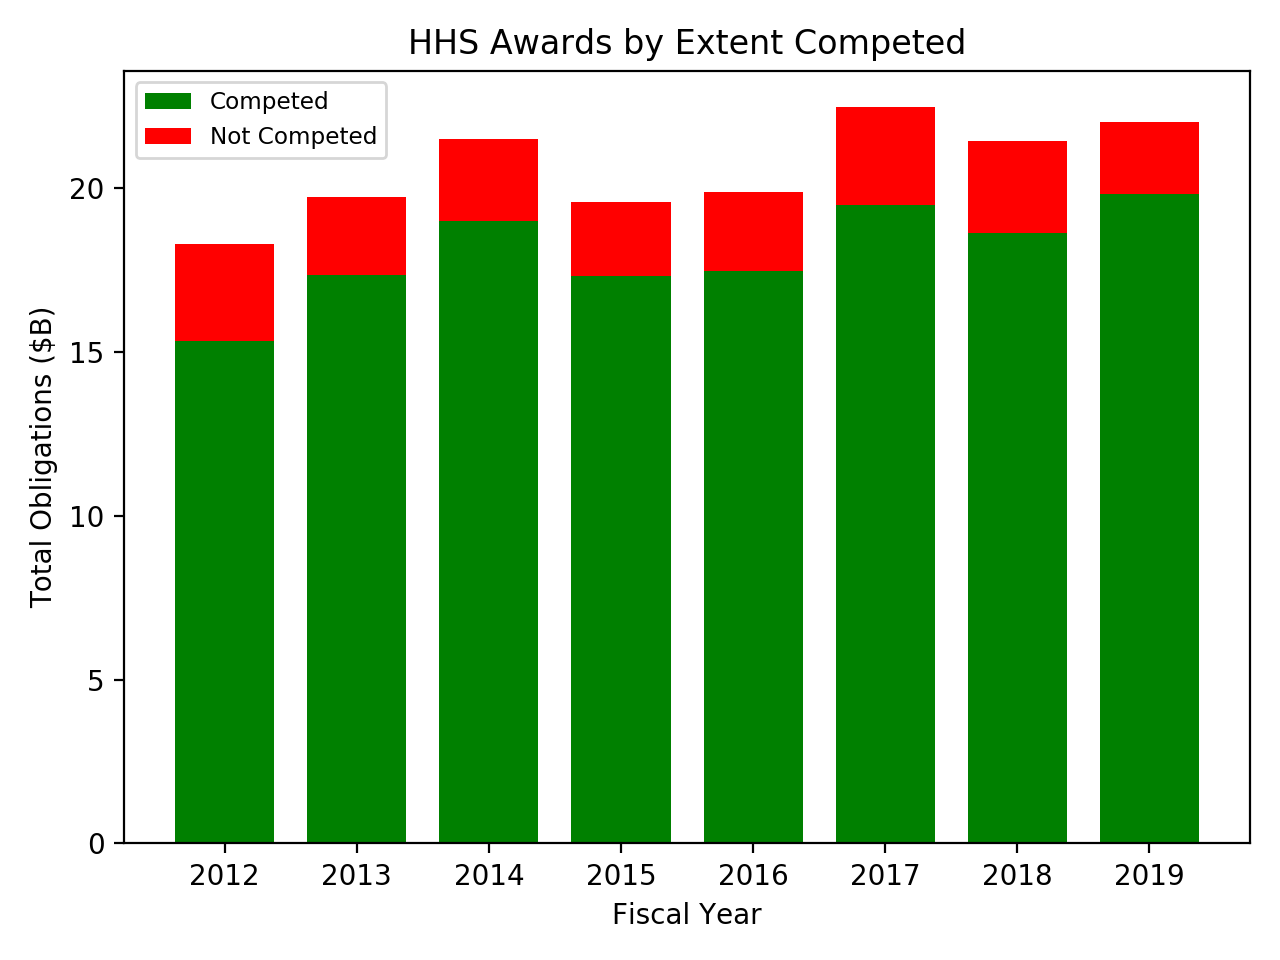

In [86]:
# Making stacked bar chart
grouping_by_year_competition_transposed = pd.DataFrame(grouping_by_year_competition.transpose())

N = 8
ind = np.arange(N)
width = 0.75
Competed = (grouping_by_year_competition_transposed['Competed'])
Not_Competed = (grouping_by_year_competition_transposed['Not Competed'])
p1 = plt.bar(ind,Competed,width,color="Green",label="Competed")
p2 = plt.bar(ind,Not_Competed,width,bottom=Competed,color='Red',label="Not Competed")


plt.ylabel('Total Obligations ($B)')
plt.xlabel('Fiscal Year')
plt.title('HHS Awards by Extent Competed')
plt.xticks(ind, ('2012', '2013', '2014', '2015', '2016','2017','2018','2019'))
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()
plt.tight_layout()
plt.savefig("Images/HHS Awards by Extent Competed.png")

In [19]:
# Looking at number of offers received for Competed
competed_total_years = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['extent_competed']=="Competed", :])
offers_total_years_competed = pd.DataFrame(competed_total_years.groupby('number_of_offers_received')['federal_action_obligation'].sum())
offers_total_years_competed['Number of Awards'] = competed_total_years.groupby('number_of_offers_received')['federal_action_obligation'].count()
total_competed_offers = offers_total_years_competed['federal_action_obligation'].sum()
offers_total_years_competed['% Total'] = (offers_total_years_competed['federal_action_obligation']/total_competed_offers)*100
offers_total_years_competed

,federal_action_obligation,Number of Awards,% Total
number_of_offers_received,,,
0.0,1.050365e+08,4934,0.075610
1.0,3.563640e+10,233296,25.652574
2.0,2.227442e+10,53326,16.034062
3.0,1.897149e+10,76959,13.656472
4.0,1.650193e+10,23955,11.878777
5.0,1.966037e+10,16342,14.152360
6.0,1.007865e+10,11681,7.255037
7.0,5.794183e+09,5907,4.170896
8.0,9.283626e+08,5370,0.668274


In [21]:
# Put number of offers into bins
bins = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,488.0]
group_names = ['1','2','3','4','5','6','7','8+']
offer_bins = offers_total_years_competed
# offer_bins.reset_index(inplace=True) #commenting out so I dont keep running it
offer_bins['Bins'] = pd.cut(offer_bins['number_of_offers_received'],bins,labels=group_names,right=True)
offer_bins_grouping = pd.DataFrame(offer_bins.groupby('Bins')['federal_action_obligation'].sum())
offer_bins_grouping['% Total'] = (offer_bins_grouping['federal_action_obligation']/total_competed_offers)*100
offer_bins_grouping

,federal_action_obligation,% Total
Bins,,
1,3.563640e+10,25.652574
2,2.227442e+10,16.034062
3,1.897149e+10,13.656472
4,1.650193e+10,11.878777
5,1.966037e+10,14.152360
6,1.007865e+10,7.255037
7,5.794183e+09,4.170896
8+,9.896912e+09,7.124212


In [22]:
# Put number of offers into bins 
bins_1 = [0.0,1.0,488.0]
group_names_1 = ['1','1+']
bins_2 = [0.0,2.0,488.0]
group_names_2 = ['2 or less','2+']
bins_3 = [0.0,3.0,488.0]
group_names_3 = ['3 or less','3+']
bins_4 = [0.0,4.0,488.0]
group_names_4 = ['4 or less','4+']
bins_5 = [0.0,5.0,488.0]
group_names_5 = ['5 or less','5+']
bins_6 = [0.0,6.0,488.0]
group_names_6 = ['6 or less','6+']
bins_7 = [0.0,7.0,488.0]
group_names_7 = ['7 or less','7+']

offer_fewer_bins = offers_total_years_competed
# offer_bins.reset_index(inplace=True) #commenting out so I dont keep running it
offer_fewer_bins['1'] = pd.cut(offer_bins['number_of_offers_received'],bins_1,labels=group_names_1,right=True)
offer_fewer_bins['2'] = pd.cut(offer_bins['number_of_offers_received'],bins_2,labels=group_names_2,right=True)
offer_fewer_bins['3'] = pd.cut(offer_bins['number_of_offers_received'],bins_3,labels=group_names_3,right=True)
offer_fewer_bins['4'] = pd.cut(offer_bins['number_of_offers_received'],bins_4,labels=group_names_4,right=True)
offer_fewer_bins['5'] = pd.cut(offer_bins['number_of_offers_received'],bins_5,labels=group_names_5,right=True)
offer_fewer_bins['6'] = pd.cut(offer_bins['number_of_offers_received'],bins_6,labels=group_names_6,right=True)
offer_fewer_bins['7'] = pd.cut(offer_bins['number_of_offers_received'],bins_7,labels=group_names_7,right=True)


offer_1_grouping = pd.DataFrame(offer_fewer_bins.groupby('1')['federal_action_obligation'].sum())
offer_1_grouping['% Total'] = (offer_1_grouping['federal_action_obligation']/total_competed_offers)*100 
offer_1_grouping = pd.DataFrame(offer_1_grouping.iloc[0])
offer_1_grouping =offer_1_grouping.transpose()

offer_2_grouping = pd.DataFrame(offer_fewer_bins.groupby('2')['federal_action_obligation'].sum())
offer_2_grouping['% Total'] = (offer_2_grouping['federal_action_obligation']/total_competed_offers)*100 
offer_2_grouping = pd.DataFrame(offer_2_grouping.iloc[0])
offer_2_grouping =offer_2_grouping.transpose()

offer_3_grouping = pd.DataFrame(offer_fewer_bins.groupby('3')['federal_action_obligation'].sum())
offer_3_grouping['% Total'] = (offer_3_grouping['federal_action_obligation']/total_competed_offers)*100 
offer_3_grouping = pd.DataFrame(offer_3_grouping.iloc[0])
offer_3_grouping =offer_3_grouping.transpose()

offer_4_grouping = pd.DataFrame(offer_fewer_bins.groupby('4')['federal_action_obligation'].sum())
offer_4_grouping['% Total'] = (offer_4_grouping['federal_action_obligation']/total_competed_offers)*100 
offer_4_grouping = pd.DataFrame(offer_4_grouping.iloc[0])
offer_4_grouping =offer_4_grouping.transpose()

offer_5_grouping = pd.DataFrame(offer_fewer_bins.groupby('5')['federal_action_obligation'].sum())
offer_5_grouping['% Total'] = (offer_5_grouping['federal_action_obligation']/total_competed_offers)*100 
offer_5_grouping = pd.DataFrame(offer_5_grouping.iloc[0])
offer_5_grouping =offer_5_grouping.transpose()

offer_6_grouping = pd.DataFrame(offer_fewer_bins.groupby('6')['federal_action_obligation'].sum())
offer_6_grouping['% Total'] = (offer_6_grouping['federal_action_obligation']/total_competed_offers)*100 
offer_6_grouping = pd.DataFrame(offer_6_grouping.iloc[0])
offer_6_grouping =offer_6_grouping.transpose()

offer_7_grouping = pd.DataFrame(offer_fewer_bins.groupby('7')['federal_action_obligation'].sum())
offer_7_grouping['% Total'] = (offer_7_grouping['federal_action_obligation']/total_competed_offers)*100 
offer_7_grouping = pd.DataFrame(offer_7_grouping.iloc[0])
offer_7_grouping =offer_7_grouping.transpose()

offer_1_grouping = offer_1_grouping.append(offer_2_grouping)
offer_1_grouping = offer_1_grouping.append(offer_3_grouping)
offer_1_grouping = offer_1_grouping.append(offer_4_grouping)
offer_1_grouping = offer_1_grouping.append(offer_5_grouping)
offer_1_grouping = offer_1_grouping.append(offer_6_grouping)
offer_1_grouping = offer_1_grouping.append(offer_7_grouping)


offer_1_grouping

,federal_action_obligation,% Total
1,3.563640e+10,25.652574
2 or less,5.791082e+10,41.686636
3 or less,7.688231e+10,55.343108
4 or less,9.338424e+10,67.221886
5 or less,1.130446e+11,81.374245
6 or less,1.231233e+11,88.629282
7 or less,1.289174e+11,92.800178


<IPython.core.display.Javascript object>


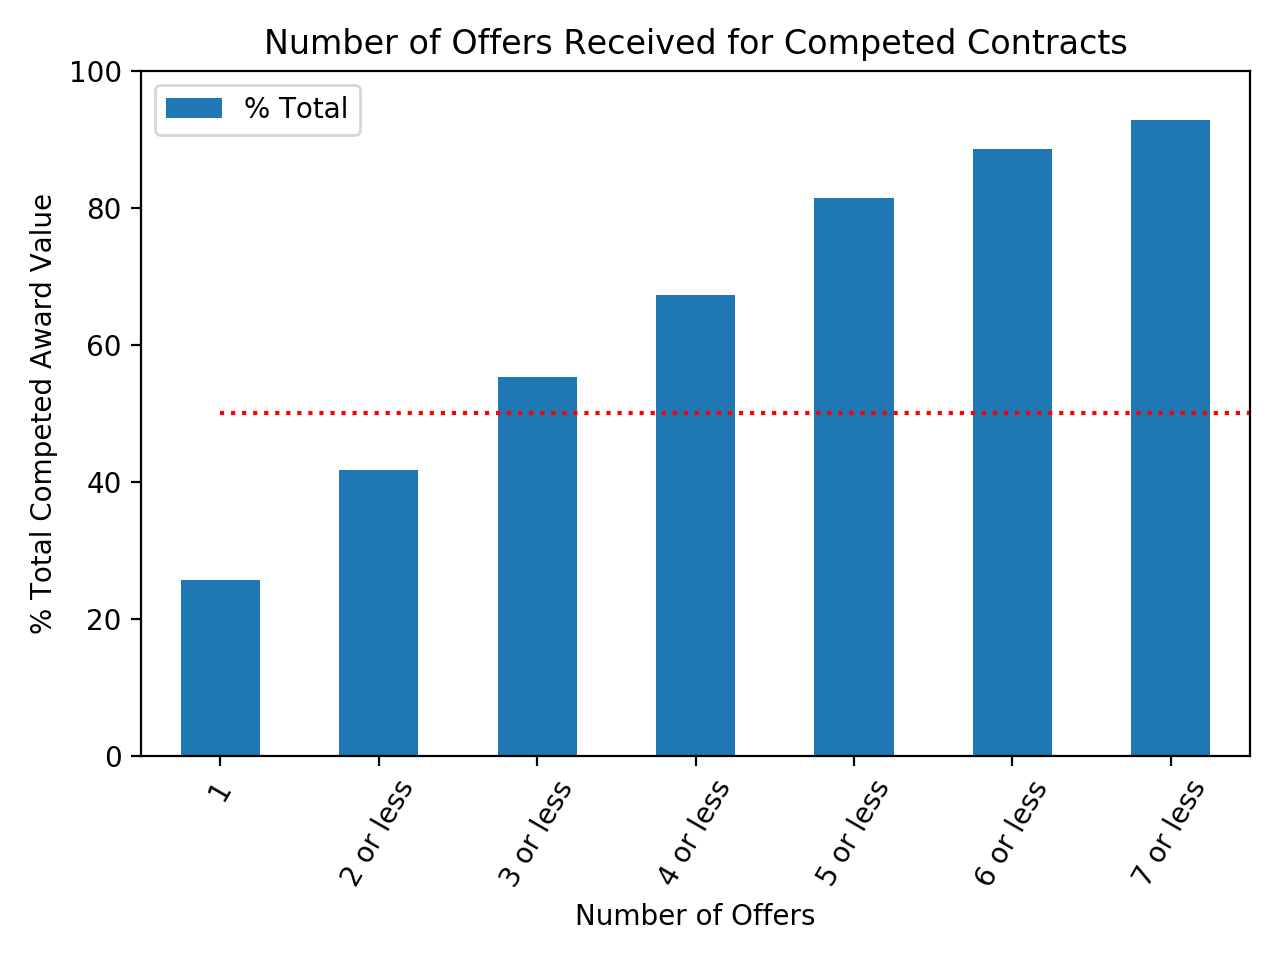

In [88]:
# Making a chart for above table
offer_percent_total = pd.DataFrame(offer_1_grouping['% Total'])
offers_chart = offer_percent_total.plot(kind='bar')
offers_chart.set_xlabel("Number of Offers")
offers_chart.set_ylabel("% Total Competed Award Value")
plt.title('Number of Offers Received for Competed Contracts')
plt.margins(0.1)
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=60)
plt.ylim(0,100)
plt.hlines(50, 0, 12, colors='Red', linestyles=':')
plt.show()
plt.tight_layout()
plt.savefig("Images/Number of Offers Received for Competed Contracts.png")

In [25]:
# Sort by agency
total_agency = pd.DataFrame(total_cleaned_competition_column.groupby(total_cleaned_competition_column['awarding_sub_agency_name'])['federal_action_obligation'].sum())
total_agency = total_agency.sort_values(by=['federal_action_obligation'], ascending=False)
# total_agency.reset_index(inplace=True)
total_agency.columns = ['Total Obligations']
total_agency

,Total Obligations
awarding_sub_agency_name,
CENTERS FOR MEDICARE AND MEDICAID SERVICES,5.266662e+10
NATIONAL INSTITUTES OF HEALTH,3.743858e+10
CENTERS FOR DISEASE CONTROL AND PREVENTION,3.187211e+10
OFFICE OF THE ASSISTANT SECRETARY FOR ADMINISTRATION (ASA),1.426080e+10
FOOD AND DRUG ADMINISTRATION,9.054974e+09
INDIAN HEALTH SERVICE,5.853174e+09
OFFICE OF ASSISTANT SECRETARY FOR PREPAREDNESS AND RESPONSE,5.577471e+09
OFFICE OF ASSISTANT SECRETARY FOR ADMINISTRATION AND MANAGEMENT,2.897389e+09
SUBSTANCE ABUSE AND MENTAL HEALTH SERVICES ADMINISTRATION,2.129355e+09


In [70]:
not_competed_total_years = pd.DataFrame(total_cleaned_competition_column.loc[total_cleaned_competition_column['extent_competed']=="Not Competed", :])
not_competed_agency = pd.DataFrame(not_competed_total_years.groupby(not_competed_total_years['awarding_sub_agency_name'])['federal_action_obligation'].sum())
# not_competed_agency.reset_index(inplace=True)
not_competed_agency.columns = ['No Competition']

competed_one_offer_agency = pd.DataFrame(competed_total_years.loc[competed_total_years['number_of_offers_received']==1,:])
one_offer_agency = pd.DataFrame(competed_one_offer_agency.groupby(competed_one_offer_agency['awarding_sub_agency_name'])['federal_action_obligation'].sum())
# one_offer_agency.reset_index(inplace=True)
one_offer_agency.columns = ['1 Offer']

competed_two_offer_agency = pd.DataFrame(competed_total_years.loc[competed_total_years['number_of_offers_received']==2,:])
two_offer_agency = pd.DataFrame(competed_two_offer_agency.groupby(competed_two_offer_agency['awarding_sub_agency_name'])['federal_action_obligation'].sum())
# two_offer_agency.reset_index(inplace=True)
two_offer_agency.columns = ['2 Offers']


low_comp_by_agency = total_agency
low_comp_by_agency =  low_comp_by_agency.merge(not_competed_agency, left_index=True,right_index=True)
low_comp_by_agency =  low_comp_by_agency.merge(one_offer_agency, left_index=True,right_index=True)
low_comp_by_agency =  low_comp_by_agency.merge(two_offer_agency, left_index=True,right_index=True)

low_comp_by_agency['Low Competition'] = low_comp_by_agency['1 Offer'] +low_comp_by_agency['2 Offers']

low_comp_by_agency['% Low Competition'] = (low_comp_by_agency['Low Competition']/low_comp_by_agency['Total Obligations'])*100

low_comp_by_agency = low_comp_by_agency.sort_values(by=['Total Obligations'],ascending=False)

low_comp_by_agency['Acceptable Competition'] = low_comp_by_agency['Total Obligations'] - low_comp_by_agency['Low Competition'] - low_comp_by_agency['No Competition']

low_comp_by_agency['% Acceptable Competition'] = (low_comp_by_agency['Acceptable Competition']/low_comp_by_agency['Total Obligations'])*100


low_comp_by_agency['No Competition'] = (low_comp_by_agency['No Competition']/1000000000)
low_comp_by_agency['Low Competition'] = (low_comp_by_agency['Low Competition']/1000000000)
low_comp_by_agency['Acceptable Competition'] = (low_comp_by_agency['Acceptable Competition']/1000000000)


low_comp_by_agency


,Total Obligations,No Competition,1 Offer,2 Offers,Low Competition,% Low Competition,Acceptable Competition,% Acceptable Competition
awarding_sub_agency_name,,,,,,,,
CENTERS FOR MEDICARE AND MEDICAID SERVICES,5.266662e+10,2.294214,1.016615e+10,7.913651e+09,18.079804,34.328769,32.292606,61.315125
NATIONAL INSTITUTES OF HEALTH,3.743858e+10,7.792646,8.462322e+09,4.433129e+09,12.895452,34.444286,16.750482,44.741233
CENTERS FOR DISEASE CONTROL AND PREVENTION,3.187211e+10,4.747225,2.872714e+09,2.986584e+09,5.859298,18.383777,21.265589,66.721619
OFFICE OF THE ASSISTANT SECRETARY FOR ADMINISTRATION (ASA),1.426080e+10,2.053469,5.068112e+09,2.067676e+09,7.135788,50.037798,5.071539,35.562805
FOOD AND DRUG ADMINISTRATION,9.054974e+09,1.427024,2.415804e+09,1.254878e+09,3.670683,40.537746,3.957268,43.702692
INDIAN HEALTH SERVICE,5.853174e+09,1.063408,1.280556e+09,3.798191e+08,1.660375,28.367084,3.129391,53.464856
OFFICE OF ASSISTANT SECRETARY FOR PREPAREDNESS AND RESPONSE,5.577471e+09,0.900765,2.452682e+09,1.378332e+09,3.831014,68.687287,0.845692,15.162650
OFFICE OF ASSISTANT SECRETARY FOR ADMINISTRATION AND MANAGEMENT,2.897389e+09,0.079602,6.931810e+08,9.270026e+08,1.620184,55.918753,1.197604,41.333892
SUBSTANCE ABUSE AND MENTAL HEALTH SERVICES ADMINISTRATION,2.129355e+09,0.015028,9.549480e+08,2.400176e+08,1.194966,56.118662,0.919362,43.175587


<IPython.core.display.Javascript object>


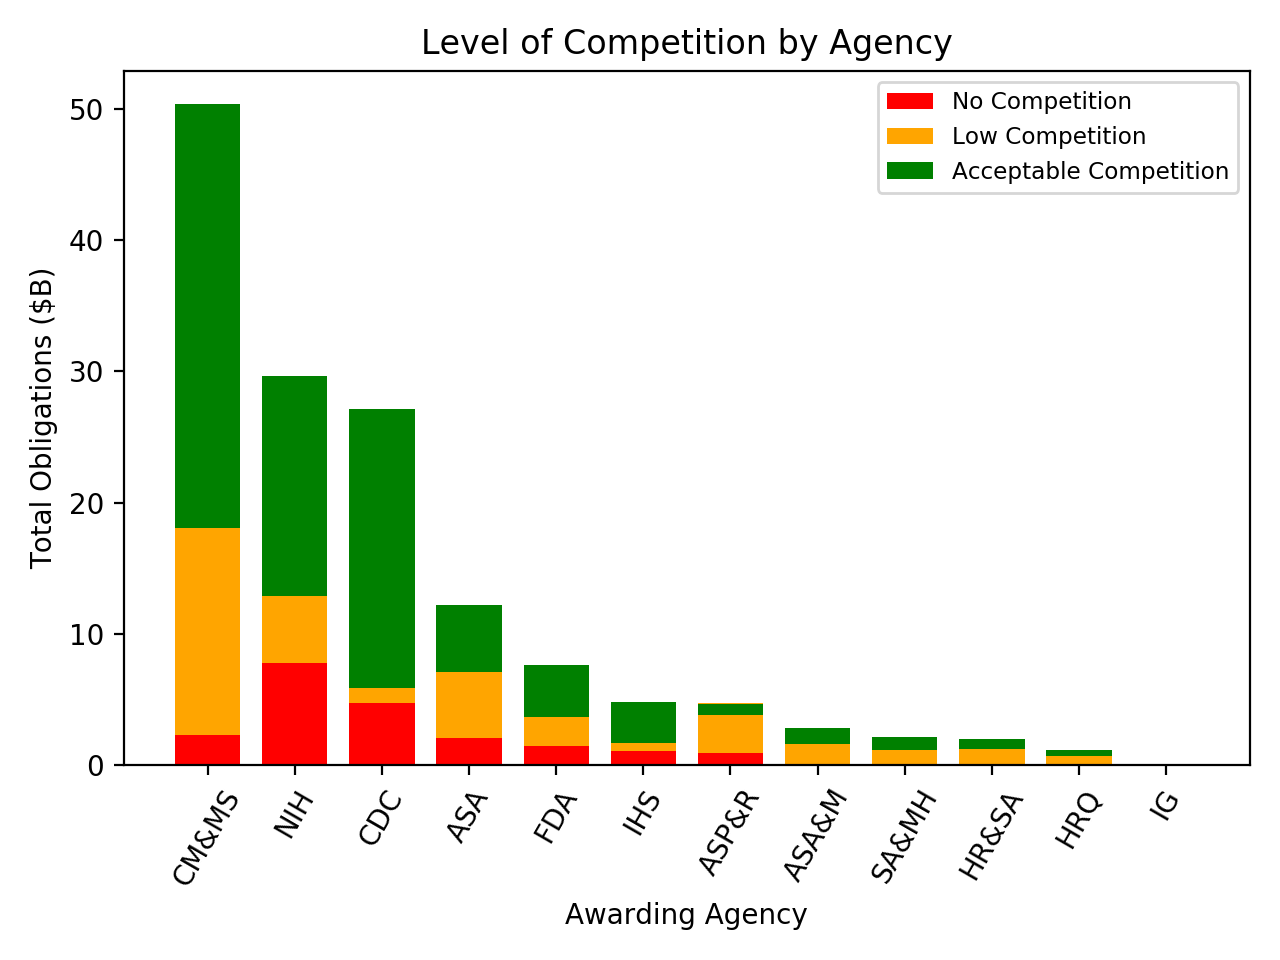

In [89]:
N = 12
ind = np.arange(N)
width = 0.75
p1 = plt.bar(ind,low_comp_by_agency['No Competition'],width,color="Red",label="No Competition")
p2 = plt.bar(ind,low_comp_by_agency['Low Competition'],width,bottom=low_comp_by_agency['No Competition'],color='Orange',label="Low Competition")
p3 = plt.bar(ind,low_comp_by_agency['Acceptable Competition'],width,bottom=low_comp_by_agency['Low Competition'],color='Green',label="Acceptable Competition")

plt.ylabel('Total Obligations ($B)')
plt.xlabel('Awarding Agency')
plt.title('Level of Competition by Agency')
plt.xticks(ind, ('CM&MS', 
                 'NIH', 
                 'CDC', 
                 'ASA', 
                 'FDA',
                 'IHS',
                 'ASP&R',
                 'ASA&M',
                'SA&MH',
                'HR&SA',
                'HRQ',
                'IG'),rotation=60)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()
plt.tight_layout()
plt.savefig("Images/Level of Competition by Agency.png")

<IPython.core.display.Javascript object>


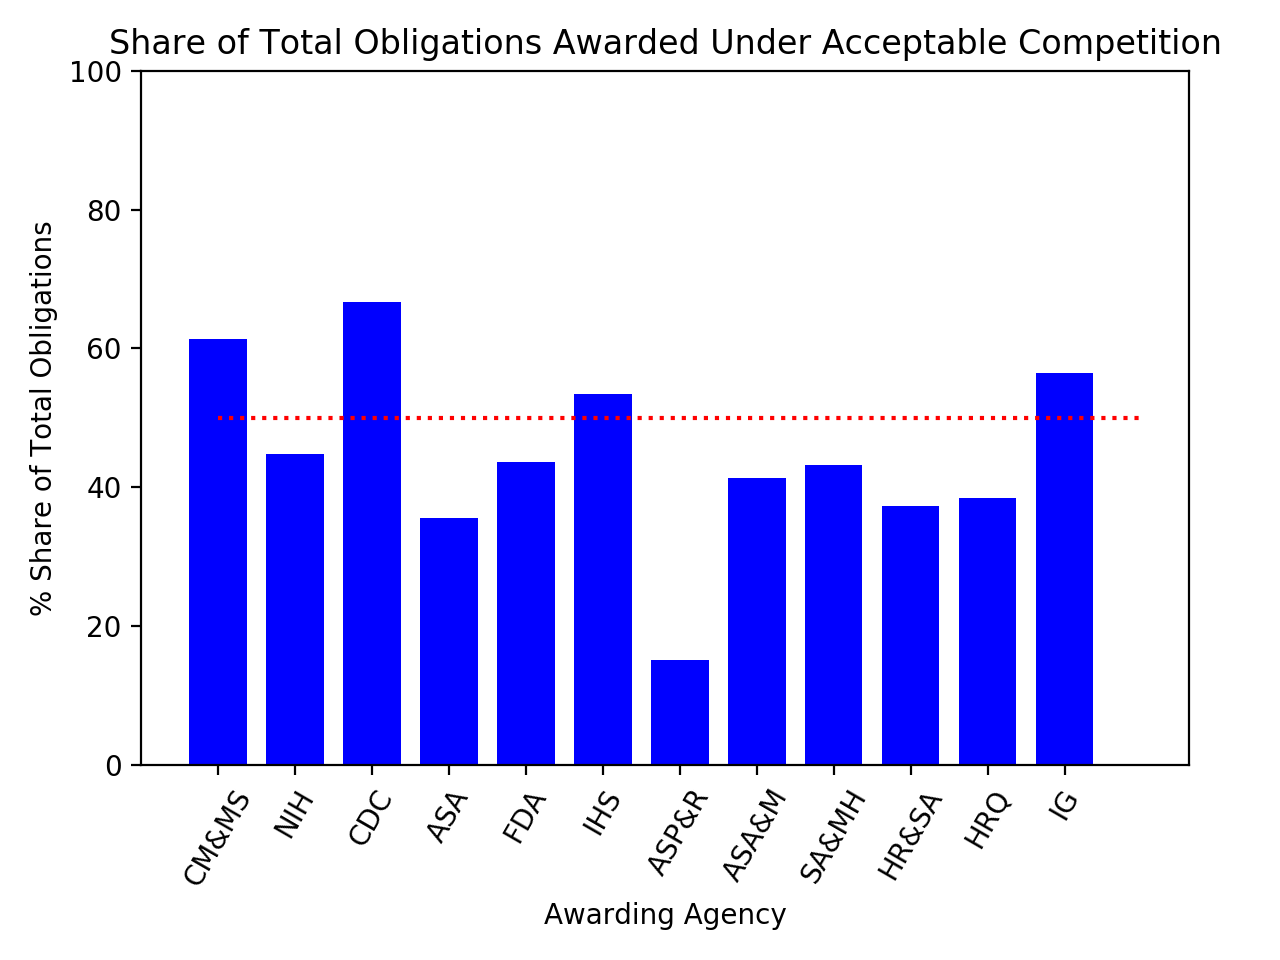

In [90]:
N = 12
ind = np.arange(N)
width = 0.75
p1 = plt.bar(ind,low_comp_by_agency['% Acceptable Competition'],width,color="Blue")

plt.ylabel('% Share of Total Obligations')
plt.xlabel('Awarding Agency')
plt.title('Share of Total Obligations Awarded Under Acceptable Competition')
plt.xticks(ind, ('CM&MS', 
                 'NIH', 
                 'CDC', 
                 'ASA', 
                 'FDA',
                 'IHS',
                 'ASP&R',
                 'ASA&M',
                'SA&MH',
                'HR&SA',
                'HRQ',
                'IG'),rotation=60)
plt.hlines(50, 0, 12, colors='Red', linestyles=':')
plt.ylim(0,100)
plt.show()
plt.tight_layout()
plt.savefig("Images/Share of Total Obligations Awarded Under Acceptable Competition.png")